C:\Users\Nate\anaconda3\envs\tensorEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


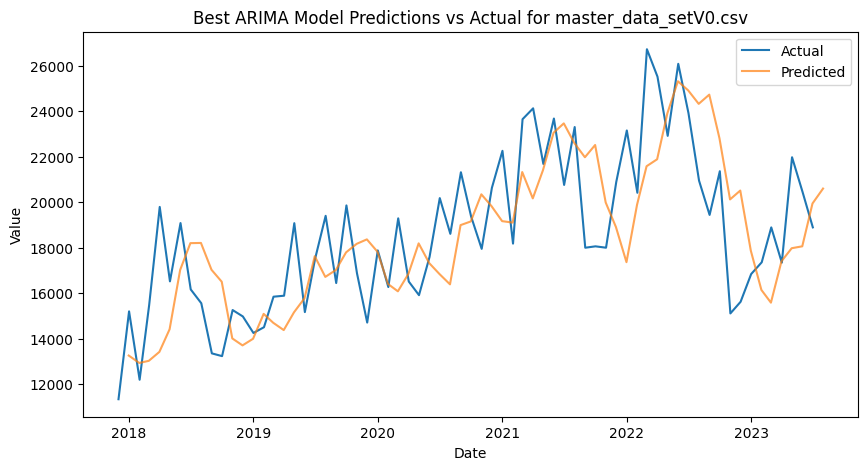

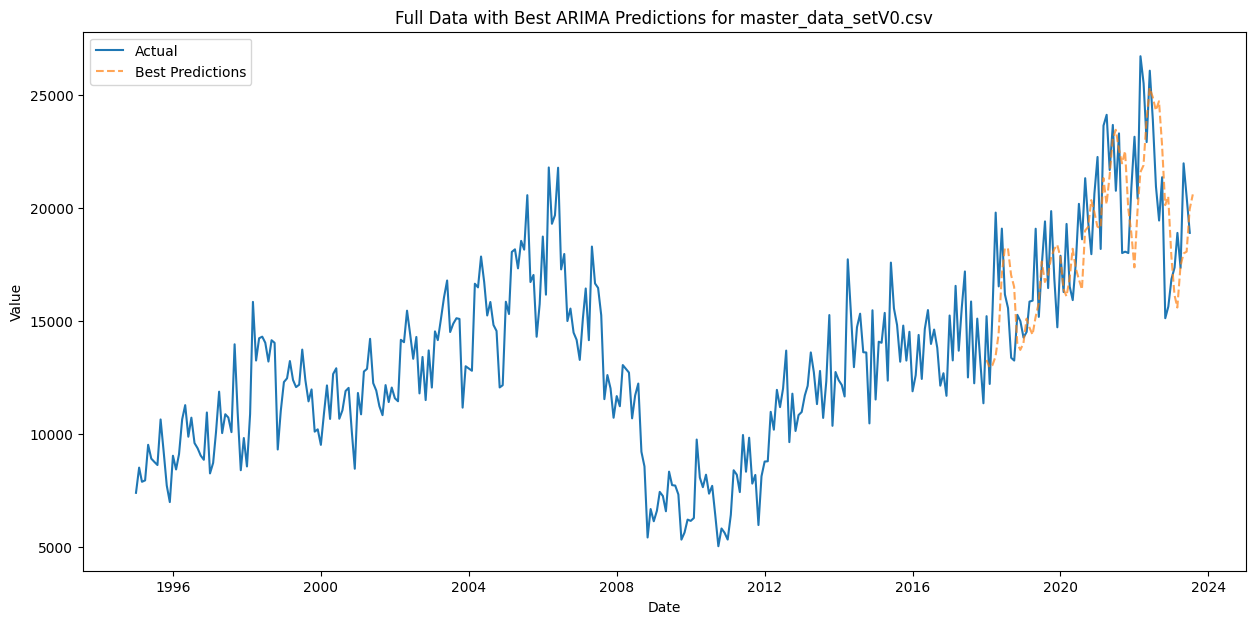

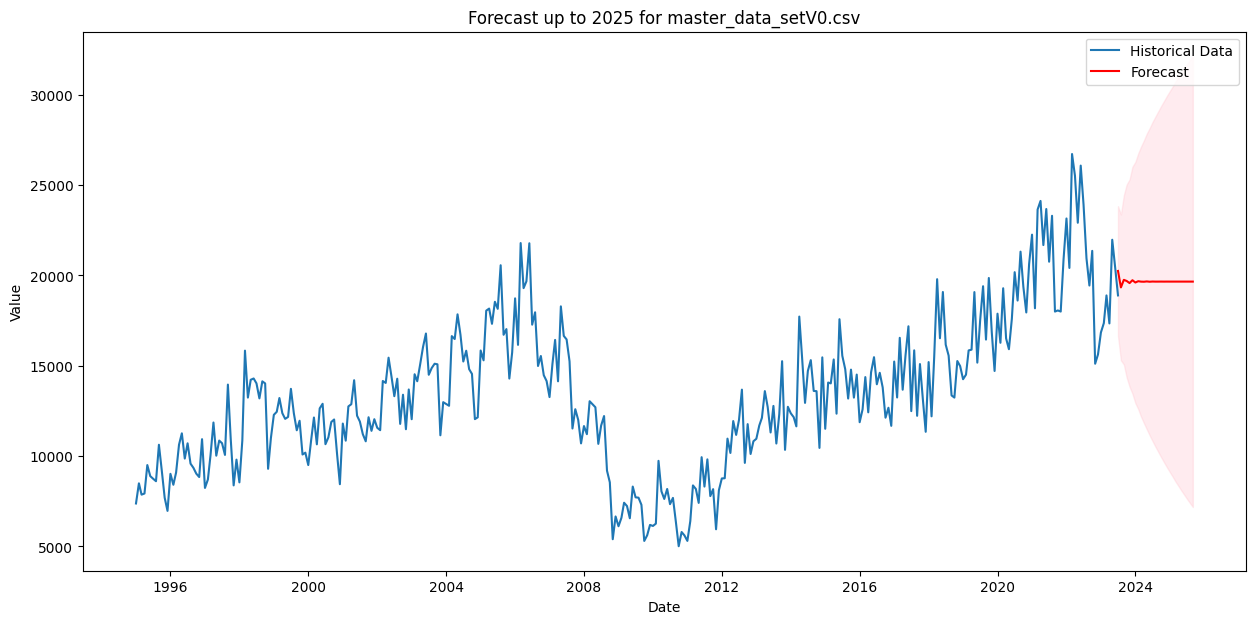

master_data_setV0.csv: RMSE = 2304.8792194671546
master_data_setV0.csv: Best hyperparameters = (2, 1, 2)


In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from itertools import product
import matplotlib.pyplot as plt
import warnings

# Assume you have a list of dataframes here
dataframe_names = ['master_data_setV0.csv']  # Add your CSV file names here

# Define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(product(p, d, q))

# This will store the best ARIMA model for each dataframe
best_models = {}

# This will store the RMSE for each model
model_rmse = {}

# This will store the best hyperparameters for each dataframe
best_hyperparams = {}

# Loop over each dataframe
for file_name in dataframe_names:
    # Load the data
    df = pd.read_csv(file_name)
    
    # Include your preprocessing here
    # ...
    
    # Assuming 'Value' is the target variable and 'Date' is the index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.index = df.index.to_period('M')  # Use 'M' for monthly frequency
    df = df[df['State'] == 'Texas']  # Or whatever state you're filtering by
    df = df.drop(columns=['State', 'Division'])
    
    columns = ["Lag_Month_1","Lag_Month_2","Lag_Month_3","Lag_Month_4",
           "Lag_Month_5","Lag_Month_6","Lag_Month_7","Lag_Month_8","Lag_Month_9","Lag_Month_10","Lag_Month_11",
           "Lag_Month_12","Lag_Month_13","Lag_Month_14","Lag_Month_15","Lag_Month_16","Lag_Month_17",
           "Lag_Month_18","Lag_Month_19","Lag_Month_20","Lag_Month_21","Lag_Month_22","Lag_Month_23",
           "Lag_Month_24","Lag_Year_1","Lag_Year_2","Lag_Year_3","Lag_Year_4","Lag_Year_5","Lag_Year_6",
           "Lag_Year_7","Lag_Year_8","Lag_Year_9","Lag_Year_10","Lag_Year_11","Lag_Year_12","Lag_Year_13",
           "Lag_Year_14","Lag_Year_15"]
    
    df = df.drop(columns=columns)


    # Define the target variable
    y = df['Value']
    
    best_rmse = float("inf")
    best_order = None
    best_model = None
    best_predictions = None
    
    # Grid search for ARIMA hyperparameters
    for param in pdq:
        try:
            # The ARIMA model
            model = ARIMA(y, order=param)
            
            # Fit the ARIMA model
            model_fit = model.fit()
            
            # Forecast
            predictions = model_fit.predict(start=len(y) - len(y)//5, end=len(y)-1)  # Adjust as needed
            
            # Calculate RMSE
            rmse = mean_squared_error(y.iloc[-len(predictions):], predictions, squared=False)
            
            # Compare RMSE and update best parameters if needed
            if rmse < best_rmse:
                best_rmse = rmse
                best_order = param
                best_model = model_fit
                best_predictions = predictions
        except Exception as e:
            # Continue if the parameter combination is not valid
            continue
    
    # Plotting the best predictions against the actual values for the validation set
    plt.figure(figsize=(10, 5))
    plot_index = y.index[-len(best_predictions):].to_timestamp()
    plt.plot(plot_index, y.iloc[-len(best_predictions):], label='Actual')
    plt.plot(best_predictions.index, best_predictions, label='Predicted', alpha=0.7)
    plt.title(f'Best ARIMA Model Predictions vs Actual for {file_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    # Plotting the entire dataset with the best predictions overlaid
    plt.figure(figsize=(15, 7))
    plot_index = y.index.to_timestamp()
    plt.plot(plot_index, y, label='Actual')
    plt.plot(best_predictions.index, best_predictions, label='Best Predictions', alpha=0.7, linestyle='--')
    plt.title(f'Full Data with Best ARIMA Predictions for {file_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    best_models[file_name] = best_model
    model_rmse[file_name] = best_rmse
    best_hyperparams[file_name] = best_order
    
    # Fit the best ARIMA model to the entire dataset
    best_order = best_hyperparams[file_name]
    best_model = ARIMA(y, order=best_order)
    best_model_fit = best_model.fit()

    # Predict from the end of the dataset to 2025
    forecast = best_model_fit.get_forecast(steps=27)  # 60 months to reach 2025 from 2020
    forecast_index = pd.date_range(start=y.index[-1].to_timestamp(), periods=27, freq='M').to_period('M')
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()
    
    # Plotting the forecast along with historical data
    plt.figure(figsize=(15, 7))
    plt.plot(y.index.to_timestamp(), y, label='Historical Data')
    plt.plot(forecast_index.to_timestamp(), forecast_values, label='Forecast', color='red')
    plt.fill_between(forecast_index.to_timestamp(), forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'Forecast up to 2025 for {file_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Print all RMSEs and hyperparameters
for name, rmse in model_rmse.items():
    print(f"{name}: RMSE = {rmse}")
    print(f"{name}: Best hyperparameters = {best_hyperparams[name]}")


C:\Users\Nate\anaconda3\envs\tensorEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Nate\anaconda3\envs\tensorEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nate\anaconda3\envs\tensorEnv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Finished fitting model 1 / 1 with parameters (2, 0, 1) and seasonal parameters (1, 0, 1, 12)
master_data_setV0.csv: Best RMSE = 1663.0318818929622
master_data_setV0.csv: Best Hyperparameters = (2, 0, 1), Seasonal Hyperparameters = (1, 0, 1, 12)


C:\Users\Nate\anaconda3\envs\tensorEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


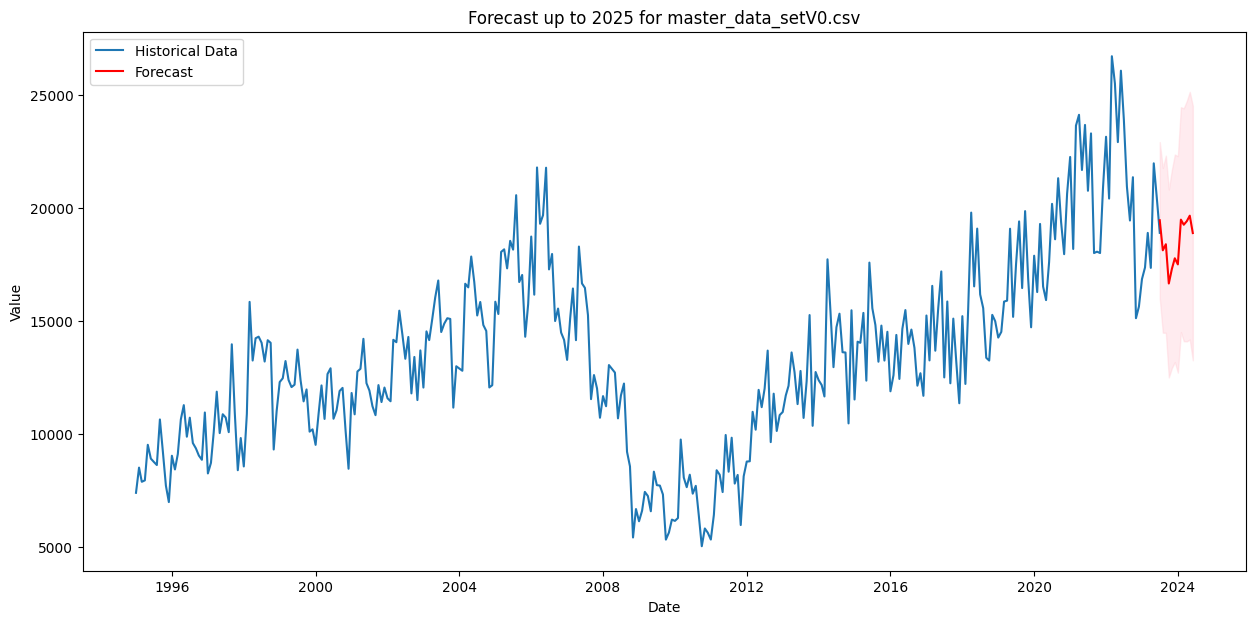

In [21]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Assume you have a list of dataframes here
dataframe_names = ['master_data_setV0.csv']  # Add your CSV file names here

# Define the non-seasonal p, d, and q parameters to take any value between 0 and 2
# And define seasonal P, D, Q and s
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  # Assuming yearly seasonality for monthly data

# Generate all different combinations of non-seasonal and seasonal parameters
# pdq = list(product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], s) for x in list(product(P, D, Q))]

pdq = [(2,0,1)]
seasonal_pdq = [(1,0,1,12)]

# master_data_setV0.csv: Best Hyperparameters = (2, 0, 1), Seasonal Hyperparameters = (1, 0, 1, 12)


# This will store the best SARIMA model for each dataframe
best_models = {}

# This will store the RMSE for each model
model_rmse = {}

# This will store the best hyperparameters for each dataframe
best_hyperparams = {}

# Loop over each dataframe
for file_name in dataframe_names:
    # Load the data
    df = pd.read_csv(file_name)
    # Include your preprocessing here
    # ...
    # Convert the Date column to datetime and set it as the index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.index = df.index.to_period('M')  # Use 'M' for monthly frequency
    
    df = df[df['State'] == 'Texas']  # Or whatever state you're filtering by
    df = df.drop(columns=['State', 'Division'])
    
    columns = ["Lag_Month_1","Lag_Month_2","Lag_Month_3","Lag_Month_4",
           "Lag_Month_5","Lag_Month_6","Lag_Month_7","Lag_Month_8","Lag_Month_9","Lag_Month_10","Lag_Month_11",
           "Lag_Month_12","Lag_Month_13","Lag_Month_14","Lag_Month_15","Lag_Month_16","Lag_Month_17",
           "Lag_Month_18","Lag_Month_19","Lag_Month_20","Lag_Month_21","Lag_Month_22","Lag_Month_23",
           "Lag_Month_24","Lag_Year_1","Lag_Year_2","Lag_Year_3","Lag_Year_4","Lag_Year_5","Lag_Year_6",
           "Lag_Year_7","Lag_Year_8","Lag_Year_9","Lag_Year_10","Lag_Year_11","Lag_Year_12","Lag_Year_13",
           "Lag_Year_14","Lag_Year_15"]
    
    df = df.drop(columns=columns)

    # Assuming 'Value' is the target variable
    y = df['Value']
    
    y_diff = y.diff().dropna()  # Assuming first order differencing

    best_rmse = float("inf")
    best_model = None
    best_params = None
    best_seasonal_params = None

    # Grid search for SARIMA hyperparameters
    total_models = len(pdq) * len(seasonal_pdq)
    model_count = 0
    for param in pdq:
        for seasonal_param in seasonal_pdq:
            model_count += 1
            try:
                model = SARIMAX(y, order=param, seasonal_order=seasonal_param)
                model_fit = model.fit(disp=False)

                # Forecast
                predictions = model_fit.get_prediction(start=pd.to_datetime('2014-01-01'), end=pd.to_datetime('2016-12-01'), dynamic=False)
                predictions = predictions.predicted_mean

                # Calculate RMSE
                rmse = mean_squared_error(y['2014-01-01':'2016-12-01'], predictions, squared=False)
                
                print(f"Finished fitting model {model_count} / {total_models} with parameters {param} and seasonal parameters {seasonal_param}")

                # Update best parameters if RMSE is lower
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = param
                    best_seasonal_params = seasonal_param
                    best_model = model_fit

            except Exception as e:
                print(f"An error occurred for model with parameters {param} and seasonal parameters {seasonal_param}: {e}")


    best_models[file_name] = best_model
    model_rmse[file_name] = best_rmse
    best_hyperparams[file_name] = (best_params, best_seasonal_params)

    # Print the best RMSE and hyperparameters
    print(f"{file_name}: Best RMSE = {best_rmse}")
    print(f"{file_name}: Best Hyperparameters = {best_params}, Seasonal Hyperparameters = {best_seasonal_params}")

    # Fit the best SARIMA model to the entire dataset
    best_params, best_seasonal_params = best_hyperparams[file_name]
    best_model = SARIMAX(y, order=best_params, seasonal_order=best_seasonal_params)
    best_model_fit = best_model.fit()

    # Forecast from the end of the dataset to 2025
    forecast_steps = (2024 - y.index[-1].year) * 12  # Months from last date to December 2025
    forecast = best_model_fit.get_forecast(steps=forecast_steps)
    forecast_index = pd.date_range(start=y.index[-1].to_timestamp(), periods=forecast_steps, freq='M').to_period('M')
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Plotting the forecast along with historical data
    plt.figure(figsize=(15, 7))
    plt.plot(y.index.to_timestamp(), y, label='Historical Data')
    plt.plot(forecast_index.to_timestamp(), forecast_values, label='Forecast', color='red')
    plt.fill_between(forecast_index.to_timestamp(), forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'Forecast up to 2025 for {file_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


C:\Users\Nate\anaconda3\envs\tensorEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Finished fitting model 1 / 1 with parameters (2, 0, 1) and seasonal parameters (1, 0, 1, 12)
master_data_setV0.csv: Best RMSE = 1582.8272503608473
master_data_setV0.csv: Best Hyperparameters = (2, 0, 1), Seasonal Hyperparameters = (1, 0, 1, 12)


C:\Users\Nate\anaconda3\envs\tensorEnv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


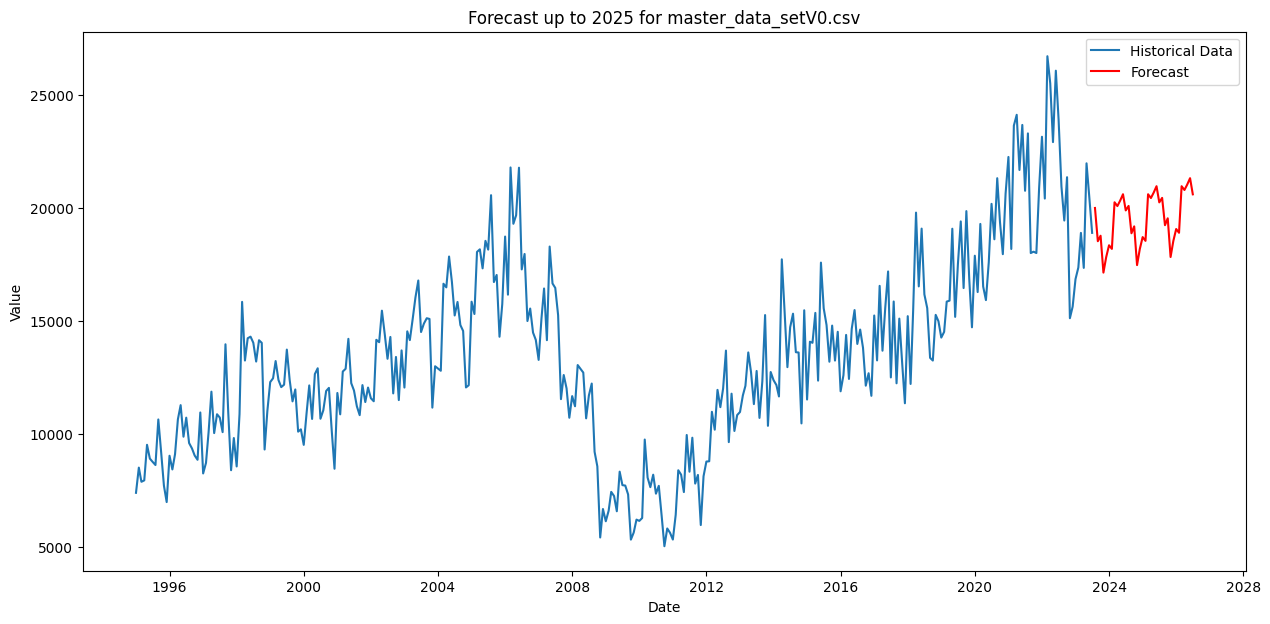

In [3]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

# Assume you have a list of dataframes here
dataframe_names = ['master_data_setV0.csv']  # Add your CSV file names here

# Define the non-seasonal p, d, and q parameters to take any value between 0 and 2
# And define seasonal P, D, Q and s
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
s = 12  # Assuming yearly seasonality for monthly data

# Generate all different combinations of non-seasonal and seasonal parameters
pdq = [(2,0,1)]
seasonal_pdq = [(1,0,1,12)]

# This will store the best SARIMA model for each dataframe
best_models = {}

# This will store the RMSE for each model
model_rmse = {}

# This will store the best hyperparameters for each dataframe
best_hyperparams = {}

# Loop over each dataframe
for file_name in dataframe_names:
    # Load the data
    df = pd.read_csv(file_name)
    # Include your preprocessing here
    # ...
    # Convert the Date column to datetime and set it as the index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.index = df.index.to_period('M')  # Use 'M' for monthly frequency
    
    df = df[df['State'] == 'Texas']  # Or whatever state you're filtering by
    df = df.drop(columns=['State', 'Division'])
    
    columns = ["Lag_Month_1","Lag_Month_2","Lag_Month_3","Lag_Month_4",
           "Lag_Month_5","Lag_Month_6","Lag_Month_7","Lag_Month_8","Lag_Month_9","Lag_Month_10","Lag_Month_11",
           "Lag_Month_12","Lag_Month_13","Lag_Month_14","Lag_Month_15","Lag_Month_16","Lag_Month_17",
           "Lag_Month_18","Lag_Month_19","Lag_Month_20","Lag_Month_21","Lag_Month_22","Lag_Month_23",
           "Lag_Month_24","Lag_Year_1","Lag_Year_2","Lag_Year_3","Lag_Year_4","Lag_Year_5","Lag_Year_6",
           "Lag_Year_7","Lag_Year_8","Lag_Year_9","Lag_Year_10","Lag_Year_11","Lag_Year_12","Lag_Year_13",
           "Lag_Year_14","Lag_Year_15"]
    
    df = df.drop(columns=columns)

    # Assuming 'Value' is the target variable
    y = df['Value']

    # Apply differencing
    y_diff = y.diff().dropna()  # Assuming first order differencing

    best_rmse = float("inf")
    best_model = None
    best_params = None
    best_seasonal_params = None

    # Grid search for SARIMA hyperparameters
    total_models = len(pdq) * len(seasonal_pdq)
    model_count = 0
    for param in pdq:
        for seasonal_param in seasonal_pdq:
            model_count += 1
            try:
                model = SARIMAX(y_diff, order=param, seasonal_order=seasonal_param)
                model_fit = model.fit(disp=False)

                # Forecast
                predictions_diff = model_fit.get_prediction(start=pd.to_datetime('2014-01-01'), end=pd.to_datetime('2016-12-01'), dynamic=False)
                predictions_diff = predictions_diff.predicted_mean

                # Reintegrate the forecast
                last_observation = y[y.index < '2014-01-01'].iloc[-1]
                predictions = last_observation + predictions_diff.cumsum()

                # Calculate RMSE
                rmse = mean_squared_error(y['2014-01-01':'2016-12-01'], predictions, squared=False)
                
                print(f"Finished fitting model {model_count} / {total_models} with parameters {param} and seasonal parameters {seasonal_param}")

                # Update best parameters if RMSE is lower
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = param
                    best_seasonal_params = seasonal_param
                    best_model = model_fit

            except Exception as e:
                print(f"An error occurred for model with parameters {param} and seasonal parameters {seasonal_param}: {e}")

    best_models[file_name] = best_model
    model_rmse[file_name] = best_rmse
    best_hyperparams[file_name] = (best_params, best_seasonal_params)

    # Print the best RMSE and hyperparameters
    print(f"{file_name}: Best RMSE = {best_rmse}")
    print(f"{file_name}: Best Hyperparameters = {best_params}, Seasonal Hyperparameters = {best_seasonal_params}")

    # Fit the best SARIMA model to the entire dataset
    best_params, best_seasonal_params = best_hyperparams[file_name]
    best_model = SARIMAX(y_diff, order=best_params, seasonal_order=best_seasonal_params)
    best_model_fit = best_model.fit()

    # Forecast from the end of the dataset to 2025
    forecast_steps = (2026 - y.index[-1].year) * 12  # Months from last date to December 2025
    forecast_diff = best_model_fit.get_forecast(steps=forecast_steps)
    forecast_values_diff = forecast_diff.predicted_mean

    # Reintegrate the forecast
    last_observation = y.iloc[-1]
    forecast_values = last_observation + forecast_values_diff.cumsum()

    # Plotting the forecast along with historical data
    plt.figure(figsize=(15, 7))
    plt.plot(y.index.to_timestamp(), y, label='Historical Data')
    plt.plot(forecast_values.index.to_timestamp(), forecast_values, label='Forecast', color='red')
    plt.title(f'Forecast up to 2025 for {file_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
